In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [22]:
data = pd.read_csv('C:/Users/sachi/Downloads/Johns_Hopkins/Diabetes/final_preprocessed_dataset_for_postoperative.csv')

In [23]:
data.shape

(17000, 26)

In [24]:
data.isnull().values.any()

False

In [25]:
data.head()

,Unnamed: 0,sex,inout,transt,age,dischdest,anesthes,surgspec,electsurg,height,...,steroid,wndclas,prsepis,dprna,dpralbum,dprhct,emergncy,optime,drenainsf,asaclas
0,0,0,0,0,59,0,0,0,1,70,...,0,0,0,7,0,7,0,165,0,1
1,1,0,0,0,77,0,0,1,1,70,...,0,1,0,17,17,17,0,98,0,1
2,2,0,0,0,64,0,0,2,1,70,...,0,0,0,4,4,4,0,79,0,1
3,3,0,0,0,48,0,0,3,0,67,...,0,1,0,0,3,0,0,265,0,1
4,4,0,1,0,76,0,0,2,1,74,...,0,1,0,12,0,0,0,132,0,1


In [26]:
data.drop('Unnamed: 0', axis=1, inplace=True)
indx = data[data['electsurg']=='Unknown'].index

data.drop(indx, axis=0, inplace=True)

In [27]:
data.head()

,sex,inout,transt,age,dischdest,anesthes,surgspec,electsurg,height,weight,...,steroid,wndclas,prsepis,dprna,dpralbum,dprhct,emergncy,optime,drenainsf,asaclas
0,0,0,0,59,0,0,0,1,70,170,...,0,0,0,7,0,7,0,165,0,1
1,0,0,0,77,0,0,1,1,70,229,...,0,1,0,17,17,17,0,98,0,1
2,0,0,0,64,0,0,2,1,70,344,...,0,0,0,4,4,4,0,79,0,1
3,0,0,0,48,0,0,3,0,67,190,...,0,1,0,0,3,0,0,265,0,1
4,0,1,0,76,0,0,2,1,74,274,...,0,1,0,12,0,0,0,132,0,1


In [28]:
features = ["sex", "inout", "transt", "age", "dischdest", "anesthes", "surgspec", "electsurg", "height", "weight",
            "diabetes", "smoke", "dyspnea", "discancr", "dprna", "dpralbum", "dprhct", "emergncy", "optime",
            "drenainsf", "steroid", "wndclas"] 
X = data[features]
y = data[["wndinf", "prsepis"]] 

In [29]:
X.dtypes

sex           int64
inout         int64
transt        int64
age           int64
dischdest     int64
anesthes      int64
surgspec      int64
electsurg    object
height        int64
weight        int64
diabetes      int64
smoke         int64
dyspnea       int64
discancr      int64
dprna         int64
dpralbum      int64
dprhct        int64
emergncy      int64
optime        int64
drenainsf     int64
steroid       int64
wndclas       int64
dtype: object

In [30]:
X

,sex,inout,transt,age,dischdest,anesthes,surgspec,electsurg,height,weight,...,dyspnea,discancr,dprna,dpralbum,dprhct,emergncy,optime,drenainsf,steroid,wndclas
0,0,0,0,59,0,0,0,1,70,170,...,0,0,7,0,7,0,165,0,0,0
1,0,0,0,77,0,0,1,1,70,229,...,0,0,17,17,17,0,98,0,0,1
2,0,0,0,64,0,0,2,1,70,344,...,0,0,4,4,4,0,79,0,0,0
3,0,0,0,48,0,0,3,0,67,190,...,0,1,0,3,0,0,265,0,0,1
4,0,1,0,76,0,0,2,1,74,274,...,0,0,12,0,0,0,132,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,0,0,83,0,0,2,0,74,269,...,0,0,0,8,0,0,88,0,0,0
16996,1,0,0,69,0,0,2,1,60,183,...,0,0,4,4,4,0,190,0,0,0
16997,0,1,0,48,0,1,2,1,72,212,...,0,0,20,20,5,0,48,0,0,1
16998,0,0,0,52,0,0,2,0,74,202,...,0,0,3,8,3,0,191,0,0,0


In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Model training
model = RandomForestClassifier()  # You can use any other classifier
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Predicted Values:")
print(y_pred)

Predicted Values:
[[0 0]
 [1 0]
 [1 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


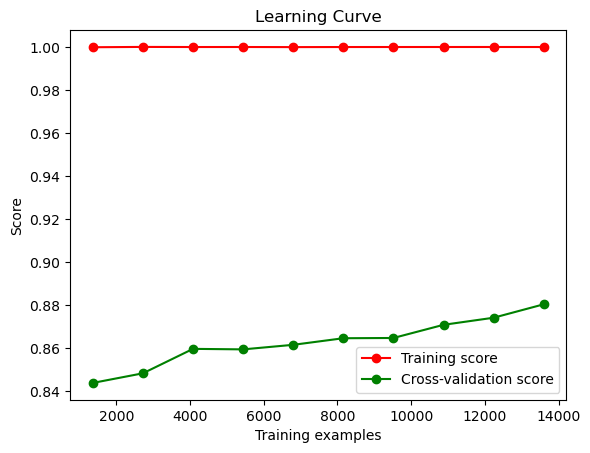

In [12]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate performance for each target variable separately
for i, target in enumerate(["wndinf", "prsepis"]):
    print(f"\nMetrics for {target}:")
    y_true = y_test[target]
    y_pred_target = y_pred[:, i]

    accuracy = accuracy_score(y_true, y_pred_target)
    precision = precision_score(y_true, y_pred_target, average='weighted')
    recall = recall_score(y_true, y_pred_target, average='weighted')
    f1 = f1_score(y_true, y_pred_target, average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")



Metrics for wndinf:
Accuracy: 0.9438235294117647
Precision: 0.9401712538948164
Recall: 0.9438235294117647
F1 Score: 0.9372327323116963

Metrics for prsepis:
Accuracy: 0.9494117647058824
Precision: 0.9447902321950765
Recall: 0.9494117647058824
F1 Score: 0.9447068192811569


In [34]:
print(y_pred[5:10])

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]]


In [35]:
X_test

,sex,inout,transt,age,dischdest,anesthes,surgspec,electsurg,height,weight,...,dyspnea,discancr,dprna,dpralbum,dprhct,emergncy,optime,drenainsf,steroid,wndclas
9732,1,0,0,73,0,1,1,1,60,232,...,1,0,21,0,21,0,75,0,0,1
3035,1,0,1,51,2,0,2,1,66,304,...,0,0,28,28,28,0,114,0,0,2
11293,1,0,0,63,3,0,6,1,69,276,...,0,0,14,14,14,0,407,0,0,1
10147,1,1,0,58,0,0,5,1,57,90,...,0,1,20,20,20,0,15,0,0,3
6396,1,1,0,66,0,2,3,1,61,141,...,0,0,12,12,12,0,63,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730,1,1,0,20,0,1,2,1,63,130,...,0,0,0,0,0,0,13,0,0,1
4731,0,0,0,87,3,2,1,1,71,210,...,0,0,67,67,20,0,70,0,0,1
8582,0,1,0,20,0,0,2,1,60,99,...,0,0,0,0,0,0,776,0,0,1
13616,1,0,1,61,1,0,2,0,64,145,...,0,0,0,1,0,1,63,0,0,3


In [36]:
print(y_test[5:10])

       wndinf  prsepis
16636       0        0
8817        0        0
16388       0        1
10787       0        0
8875        0        0


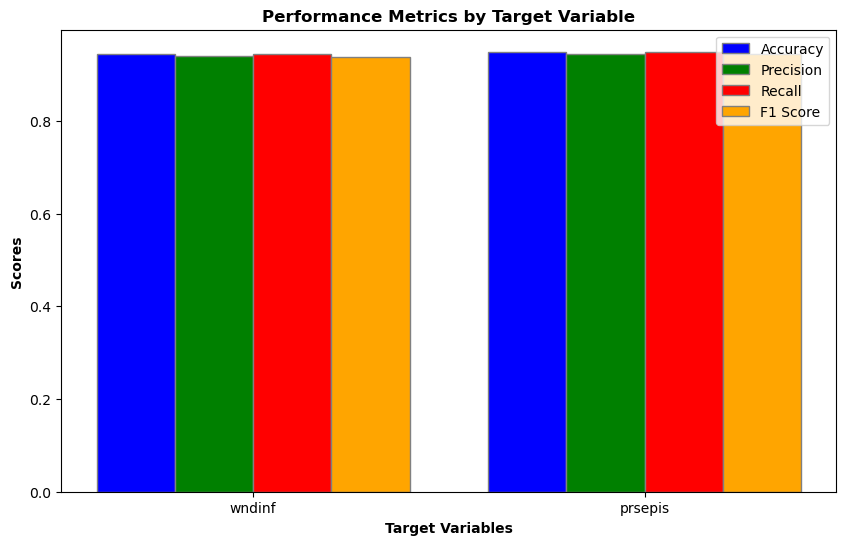

In [37]:
import matplotlib.pyplot as plt

# Define target variables
targets = ["wndinf", "prsepis"]

# Initialize lists to store metric scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate metrics for each target variable separately
for target in targets:
    y_true = y_test[target]
    y_pred_target = y_pred[:, targets.index(target)]

    accuracy_scores.append(accuracy_score(y_true, y_pred_target))
    precision_scores.append(precision_score(y_true, y_pred_target, average='weighted'))
    recall_scores.append(recall_score(y_true, y_pred_target, average='weighted'))
    f1_scores.append(f1_score(y_true, y_pred_target, average='weighted'))

# Plot the scores
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Position of bars on x-axis
r1 = range(len(targets))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]
r4 = [x + bar_width*3 for x in r1]

# Create bars for each metric
plt.bar(r1, accuracy_scores, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_scores, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall_scores, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='orange', width=bar_width, edgecolor='grey', label='F1 Score')

# Add labels and title
plt.xlabel('Target Variables', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(targets))], targets)
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Metrics by Target Variable', fontweight='bold')
plt.legend()

# Show plot
plt.show()


In [18]:
#def decode_predictions(y_pred):
#    sepis_mapping = {0: "No", 1: "Yes"}
#    wound_infection_mapping = {0: "No", 1: "Yes"}
#    
#    decoded_predictions = {
#        "Presence of sepsis": sepis_mapping[y_pred[0]],
#        "Presence of wound infection": wound_infection_mapping[y_pred[1]],
#    }
    
#    return decoded_predictions

# Example usage:
#y_pred = [1, 0]  # Example predicted output
#decoded_predictions = decode_predictions(y_pred)
#print(decoded_predictions)


In [38]:
import joblib
# Save the model to a file
joblib.dump(model, 'diab.joblib')


['diab.joblib']

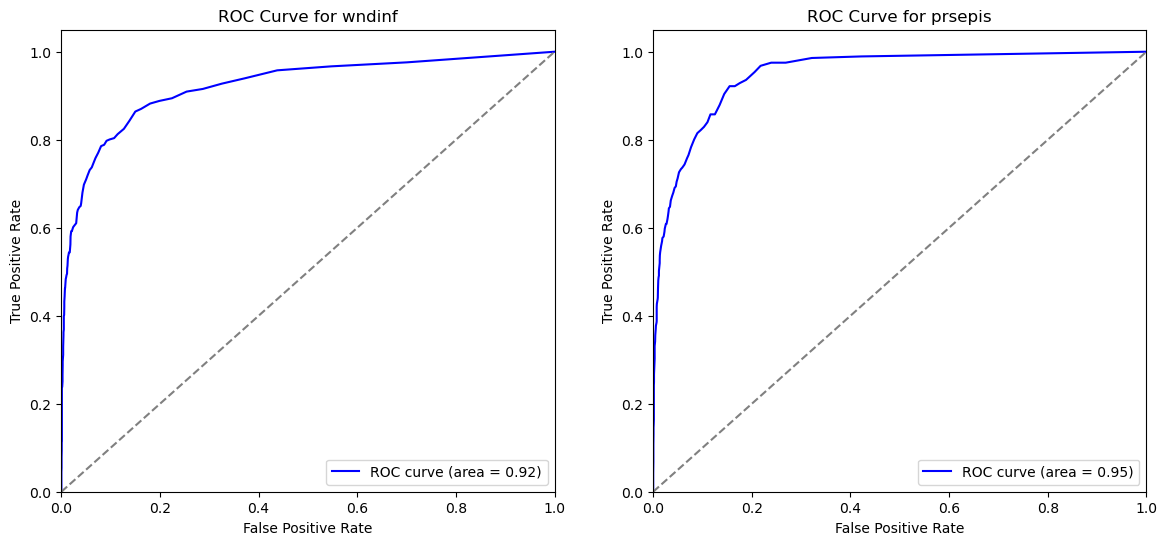

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('final_preprocessed_dataset_for_postoperative.csv')

# Drop unnecessary columns and handle missing values
data.drop('Unnamed: 0', axis=1, inplace=True)
data = data[data['electsurg'] != 'Unknown']

# Define features and target variables
features = ["sex", "inout", "transt", "age", "dischdest", "anesthes", "surgspec", "electsurg", "height", "weight",
            "diabetes", "smoke", "dyspnea", "discancr", "dprna", "dpralbum", "dprhct", "emergncy", "optime",
            "drenainsf", "steroid", "wndclas"]
X = data[features]
y = data[["wndinf", "prsepis"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)

# Plot ROC curve and calculate AUC for each target variable
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

for i, target in enumerate(["wndinf", "prsepis"]):
    y_true = y_test[target]
    y_proba = y_pred_proba[i][:, 1]  # Probability of the positive class

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)

    # Plot ROC curve
    ax[i].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
    ax[i].plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax[i].set_xlim([0.0, 1.0])
    ax[i].set_ylim([0.0, 1.05])
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    ax[i].set_title(f'ROC Curve for {target}')
    ax[i].legend(loc='lower right')

plt.show()


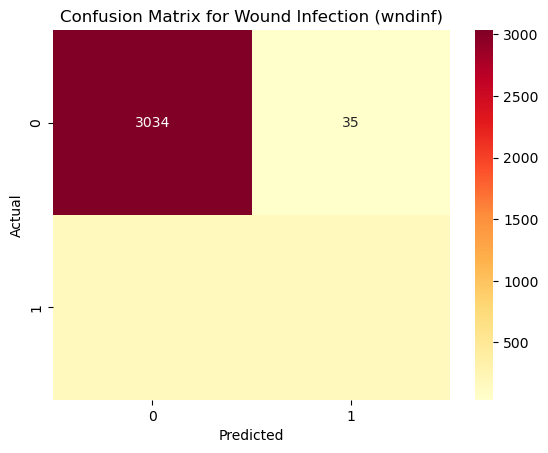

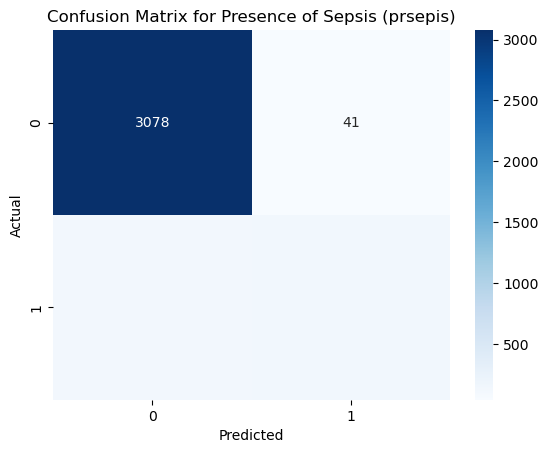

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix for wndinf
conf_matrix_wndinf = confusion_matrix(y_test['wndinf'], model.predict(X_test)[:, 0])
sns.heatmap(conf_matrix_wndinf, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix for Wound Infection (wndinf)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for prsepis
conf_matrix_prsepis = confusion_matrix(y_test['prsepis'], model.predict(X_test)[:, 1])
sns.heatmap(conf_matrix_prsepis, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Presence of Sepsis (prsepis)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


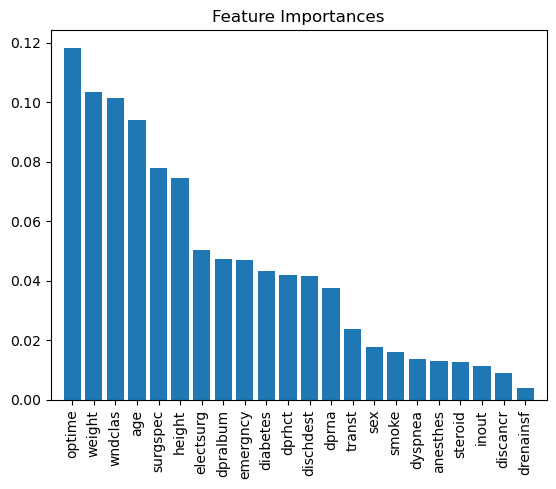

In [13]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the model
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


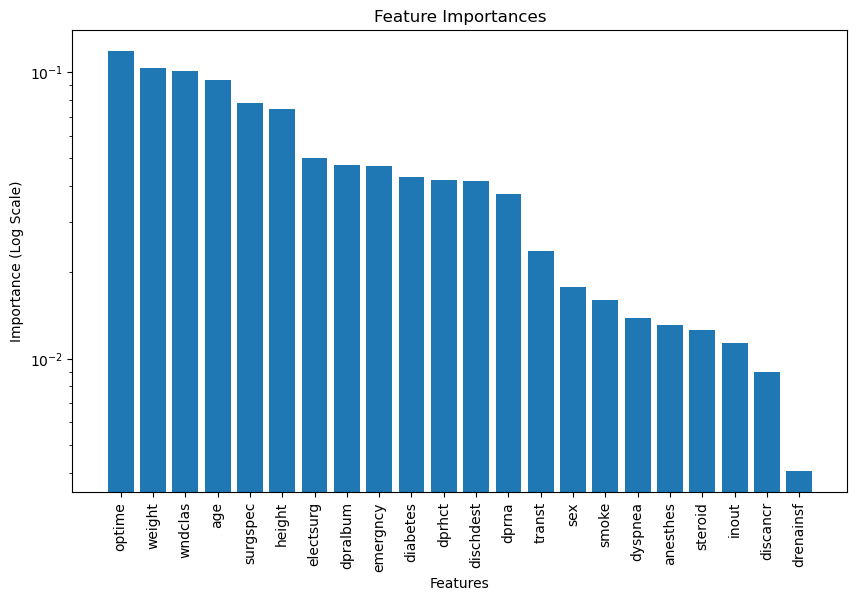

In [14]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the model with log scale
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.yscale('log')  # Change the y-axis to log scale
plt.xlabel('Features')
plt.ylabel('Importance (Log Scale)')
plt.show()
